Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage
from skimage import io
from skimage import data
from skimage.util.dtype import dtype_range
from skimage.util import img_as_ubyte
from skimage import exposure

Loading and visualizing the Image



*   Road lane image
*   Astronaut image







# New section

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


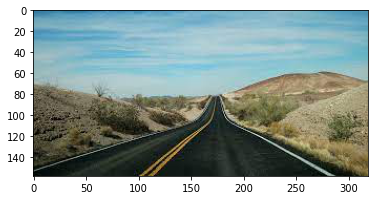

In [4]:
image = io.imread('/content/drive/MyDrive/Colab Notebooks/img1.jpg')
plt.imshow(image)

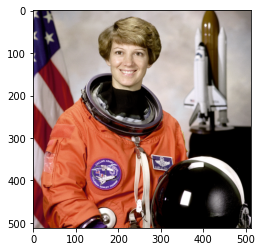

In [5]:
astronaut = data.astronaut()
plt.imshow(astronaut)

Converting to grayscale image

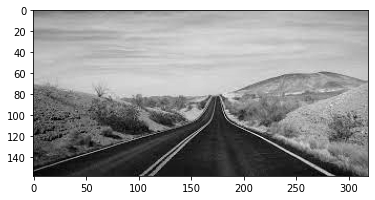

In [6]:
from skimage.color import rgb2gray

img = rgb2gray(image)
plt.imshow(img/255.0,cmap="gray")

Resizing the image to 256 X 256

Histogram Equilization

(array([177., 195., 186., 197., 192., 180., 199., 151., 196., 222., 244.,
         84., 242., 212.,  62., 291., 210., 148., 243., 103., 250., 215.,
        135., 256., 124., 259., 109., 248., 255., 136., 299., 224., 121.,
        238., 281., 110., 228., 124., 209., 262., 127., 236., 199., 215.,
        196., 201., 193., 201., 187., 237., 209., 213., 171., 193., 222.,
        214., 192., 192., 205., 191., 202., 212., 173., 218., 179., 199.,
        184., 205., 191., 208., 202., 194., 189., 196., 185., 201., 194.,
        219., 177., 190., 203., 211., 182., 207., 177., 219., 187., 196.,
        212., 189., 193., 188., 218., 187., 188., 216., 193., 171., 208.,
        218., 221., 163., 215., 171., 196., 197., 225., 183., 189., 207.,
        185., 200., 202., 230., 176., 196., 187., 183., 208., 206., 184.,
        178., 179., 221., 208., 170., 205., 193., 192., 222., 214., 170.,
        189., 207., 233., 134., 213., 222., 151., 220., 196., 170., 192.,
        194., 200., 170., 206., 201., 

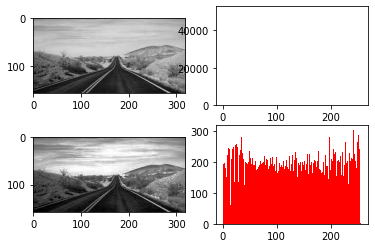

In [9]:
# Global equalization
img_rescale = exposure.equalize_hist(img)
img_rescale = np.array(255*img_rescale, dtype = 'uint8')

plt.subplot(221)
plt.imshow(img,cmap='gray')
plt.subplot(222)
plt.hist(img.flatten(),256,[0,256], color = 'r')

plt.subplot(223)
plt.imshow(img_rescale,cmap=plt.cm.gray)
plt.subplot(224)
plt.hist(img_rescale.flatten(),256, [0,256], color = 'r')


Adding noise to image


*   Gaussian Noise
*   Salt and pepper Noise



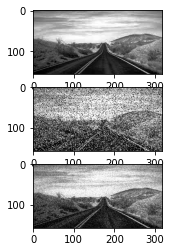

In [25]:
from skimage import filters
from skimage.util import random_noise

#SP Noise
sp_img = random_noise(img_rescale, mode='s&p',amount=0.3)

sp_img = np.array(255*sp_img, dtype = 'uint8')

#Gaussian Noise
gauss_img = random_noise(img_rescale, mode='gaussian')

gauss_img = np.array(255*gauss_img, dtype = 'uint8')

plt.subplot(311)
plt.imshow(img_rescale,cmap=plt.cm.gray)

plt.subplot(312)
plt.imshow(sp_img,cmap=plt.cm.gray)

plt.subplot(313)
plt.imshow(gauss_img,cmap=plt.cm.gray)

Using inbuilt methods available with Open CV

Types of Filters applied:


*   Median Filter
*   Gaussian Filter
*   Mean Filter(averaging filter)





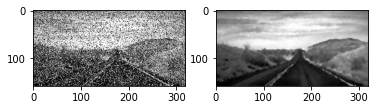

In [21]:
#Median Filter - removes(sp noise)
median = cv2.medianBlur(sp_img,5)
plt.subplot(121)
plt.imshow(sp_img,cmap='gray')
plt.subplot(122)
plt.imshow(median,cmap='gray')

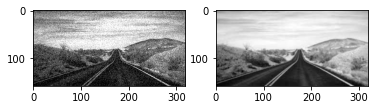

In [12]:
#Gaussian Filter
blur = cv2.GaussianBlur(img,(3,3),0)
plt.subplot(121)
plt.imshow(gauss_img,cmap='gray')
plt.subplot(122)
plt.imshow(blur,cmap='gray')

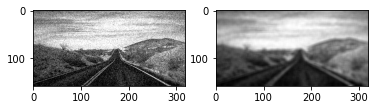

In [23]:
#mean filter
figure_size =  7
mean_filter_gauss_noise = cv2.blur(gauss_img,(figure_size, figure_size))

plt.subplot(121)
plt.imshow(gauss_img,cmap=plt.cm.gray)
plt.subplot(122)
plt.imshow(mean_filter_gauss_noise,cmap=plt.cm.gray)

Image Thresholding


*   Converting grayscale image into binary image(black and white)



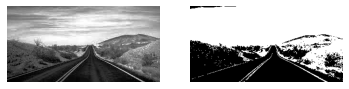

In [26]:
binary = img_rescale > 100

plt.subplot(1, 2, 1)
plt.imshow(img_rescale, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(binary, cmap=plt.cm.gray)
plt.axis('off')

plt.show()

Morphological Operation


*   Erosion
*   Dilution



(-0.5, 255.5, 255.5, -0.5)

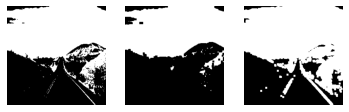

In [ ]:
binary = np.array(255*binary, dtype = 'uint8')

kernel = np.ones((5,5), np.uint8)

img_erosion = cv2.erode(binary, kernel)
img_dilation = cv2.dilate(binary, kernel)

plt.subplot(131)
plt.imshow(binary, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(132)
plt.imshow(img_erosion, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(133)
plt.imshow(img_dilation, cmap=plt.cm.gray)
plt.axis('off')
